In [5]:
%%capture
! pip install scikit-learn numpy matplotlib pandas

In [6]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("email/emails.csv") #Data imported from Kaggle. Balaka Biswas. 1=spam, 0=ham
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# ...make the data set ...
dfx=df.drop(columns=["Email No.","Prediction"]) #prediction is output thing
dfy=df["Prediction"]
print(f"X IS: \n {dfx.head()}\n\n Y IS: \n {dfy.head()}")


X IS: 
    the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  connevey  \
0    0   0    1    0    0   0    2    0    0   0  ...             0         0   
1    8  13   24    6    6   2  102    1   27  18  ...             0         0   
2    0   0    1    0    0   0    8    0    0   4  ...             0         0   
3    0   5   22    0    5   1   51    2   10   1  ...             0         0   
4    7   6   17    1    5   2   57    0    9   3  ...             0         0   

   jay  valued  lay  infrastructure  military  allowing  ff  dry  
0    0       0    0               0         0         0   0    0  
1    0       0    0               0         0         0   1    0  
2    0       0    0               0         0         0   0    0  
3    0       0    0               0         0         0   0    0  
4    0       0    0               0         0         0   1    0  

[5 rows x 3000 columns]

 Y IS: 
 0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


Text(0.5, 1.0, 'Training Classification')

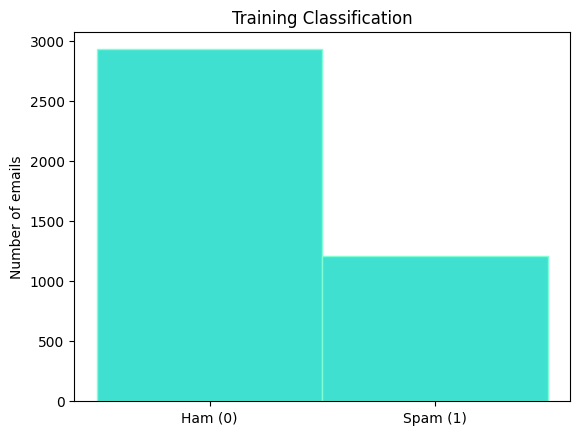

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(dfx,dfy,test_size=0.2,random_state=40)
#we got xtrain for training x and ytrain for training y, and xtest and ytest for testing...
plt.hist(ytrain, bins=2, color="turquoise",edgecolor="aquamarine",rwidth=1)
plt.xticks([0.25, 0.75], ["Ham (0)", "Spam (1)"])
plt.ylabel("Number of emails")
plt.title("Training Classification")

The Upper Bounds of Ham 0 is 717.0 and of Spam 1 is 318.0 


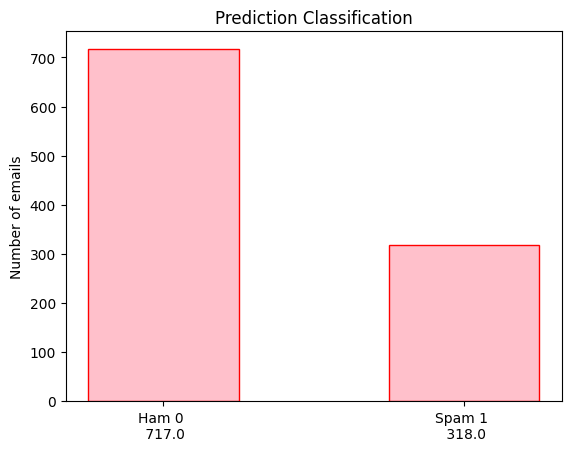

In [33]:
model=MultinomialNB()
model.fit(xtrain,ytrain)
outpred=model.predict(xtest)
cnt,_,_=plt.hist(outpred,bins=[0.0,0.5, 1.0], color="pink",edgecolor="red",rwidth=0.5)
plt.xticks([0.25, 0.75], [f"Ham 0 \n {cnt[0]}", f"Spam 1 \n {cnt[1]}"])
plt.ylabel("Number of emails")
plt.title("Prediction Classification")
print(f"The Upper Bounds of Ham 0 is {cnt[0]} and of Spam 1 is {cnt[1]} ")

The Upper Bounds of Ham 0 is 741.0 and of Spam 1 is 294.0 


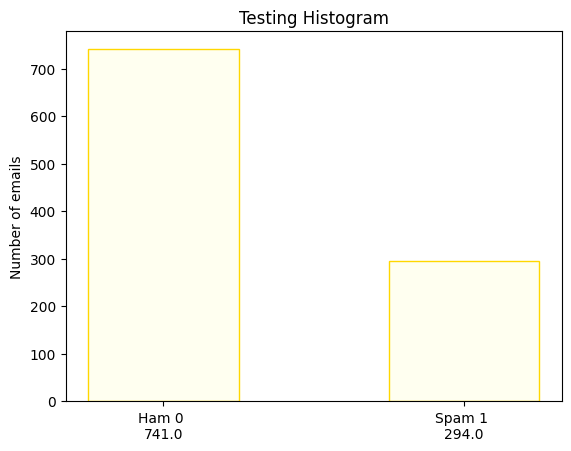

In [34]:
#Visualizing the testing outputs to compare with the above pink graph...
cnts,_,_=plt.hist(ytest,bins=[0.0,0.5, 1.0], color="ivory",edgecolor="gold",rwidth=0.5)
plt.xticks([0.25, 0.75], [f"Ham 0 \n{cnts[0]}", f"Spam 1 \n{cnts[1]}"])
plt.ylabel("Number of emails")
plt.title("Testing Histogram")
print(f"The Upper Bounds of Ham 0 is {cnts[0]} and of Spam 1 is {cnts[1]} ")

In [36]:
#In our prediction, ham (0) is 717.0 and spam (1) is 318.0
#In original testing data, ham is 741.0 and spam is 294.0
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
#To Assess Model Performance using Confusion Matrix, Receiver Operating Characteristics and Area Und Curve...

Text(0, 0.5, 'Actual')

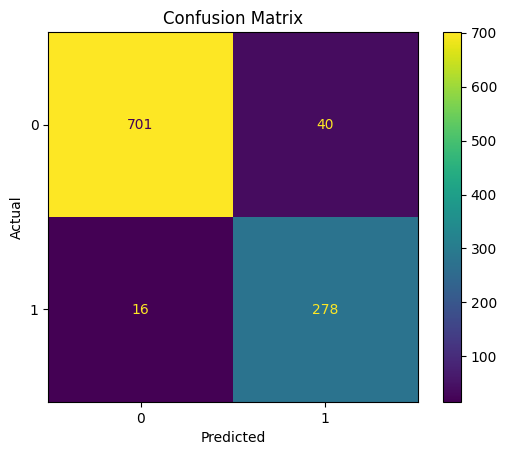

In [38]:
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [39]:
#From Confusion Matrix, we see TP=701, FP=16, TN=278, FN=40
#TP is True Positive, FN is False Negative ... so on

Text(0, 0.5, 'True  Positive Rate tpr')

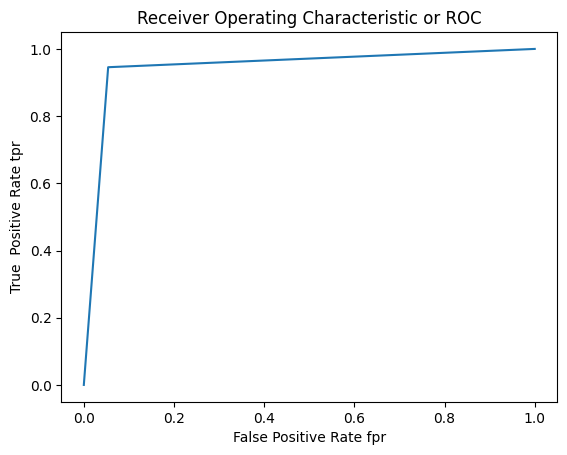

In [44]:
fpr,tpr,_=roc_curve(ytest,outpred)
plt.plot(fpr,tpr)
plt.title("Receiver Operating Characteristic or ROC")
plt.xlabel("False Positive Rate fpr")
plt.ylabel("True  Positive Rate tpr")

In [46]:
#For Area Under curve of roc
area=auc(fpr,tpr)
print(area)

0.9457985623399158


In [64]:
# The Area Under the curve for ROC is 0.94579 which is 94.5785% , which is very high. The Model is Good
# You may compare with other classification models to see which is better. It is AUC of the ROC


Text(0, 0.5, 'Words')

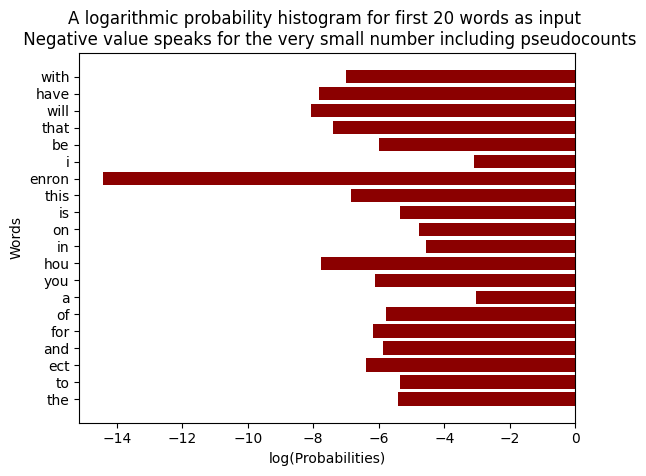

In [72]:
#Understanding the Input and Processing
# P(Ham|x1,x2,x3 ... xn)=P(Ham)xP(x1|Ham)xP(x2|Ham)xP(x3|Ham)...P(xn|Ham)   | where P(Ham) is Prior Probability
# P(Spam|x1,x2,x3 ... xn)=P(Spam)xP(x1|Spam)xP(x2|Spam)xP(x3|Spam)...P(xn|Spam) |where P(Spam) is Prior Probability
# If any of the smaller probabilities have 0 value, a pseudocount is added
# Because of this extreme multiplication of small numbers, a very small number is obtained
# This gives Stack Underflow error
# The function naturally uses log, so that the effect of product is summed and a larger value is obtained
# That is why, log of probabilities will be shown in the following ...


logprob=model.feature_log_prob_[1][:20]
words=dfx.columns[:20]
plt.barh(words,logprob,color="darkred")
plt.title(f"A logarithmic probability histogram for first 20 words as input \n Negative value speaks for the very small number, including pseudocounts")
plt.xlabel("log(Probabilities)")
plt.ylabel("Words")